In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv('C:\College\Machine Learning\Linear Regression\Housing_dataSet.csv')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [219]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [220]:
#as our data contains categorical data so we need to covert categoric data to numeric data
#converting into numeric data

housing['mainroad'] = housing['mainroad'].map({'yes':1, 'no':0})
housing['guestroom'] = housing['guestroom'].map({'yes':1, 'no':0})
housing['basement'] = housing['basement'].map({'yes':1, 'no':0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes':1, 'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes':1, 'no':0})
housing['prefarea'] = housing['prefarea'].map({'yes':1, 'no':0})

In [221]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [222]:
status = pd.get_dummies(housing['furnishingstatus'])

In [223]:
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [224]:
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [225]:
#adding these coloum and droping old coloumns
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [226]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [227]:
housing['areaperbedroom'] = housing['area']/housing['bedrooms']
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [228]:
X = housing[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','semi-furnished','unfurnished','areaperbedroom','bbratio']]
Y = housing['price']

# Building the model

In [229]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,test_size = 0.3)

In [230]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

lm_l = sm.OLS(Y_train,X_train).fit()

In [231]:
X_train[:5]

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
71,1.0,6000,4,2,4,1,0,0,0,1,0,0,0,1,1500.000000,0.500000
78,1.0,5700,3,1,1,1,1,1,0,1,2,1,0,0,1900.000000,0.333333
390,1.0,2135,3,2,2,0,0,0,0,0,0,0,0,1,711.666667,0.666667
169,1.0,6540,4,2,2,0,0,0,0,1,0,0,1,0,1635.000000,0.500000
391,1.0,3036,3,1,2,1,0,1,0,0,0,0,1,0,1012.000000,0.333333


In [232]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     50.54
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.97e-79
Time:                        00:34:20   Log-Likelihood:                -5835.3
No. Observations:                 381   AIC:                         1.170e+04
Df Residuals:                     365   BIC:                         1.177e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             8.92e+05   7.84e+05     

# Rescaling(Normalization to simple scale)

In [233]:
#Normalzation
def normalize(x):
    return ( (x - np.mean(x))/(max(x) - min(x)) )

In [234]:
housing = housing.apply(normalize)

In [235]:
X = housing[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','semi-furnished','unfurnished','areaperbedroom','bbratio']]
Y = housing['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,test_size = 0.3)
X_train = sm.add_constant(X_train)
lm_l = sm.OLS(Y_train,X_train).fit()

In [236]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     49.91
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           9.04e-79
Time:                        00:34:20   Log-Likelihood:                 355.91
No. Observations:                 381   AIC:                            -679.8
Df Residuals:                     365   BIC:                            -616.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0049      0.005     

In [237]:
def vif_cal(input_data , dependent_col):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_vars = input_data.drop([dependent_col],axis=1)
    xvar_names = x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i],vif]
    return vif_df.sort_values(by = 'Vif',axis=0, ascending=False,inplace=False)

In [238]:
vif_cal(input_data=housing, dependent_col='price')

,Var,Vif
2,bathrooms,20.21
14,bbratio,19.04
13,areaperbedroom,17.59
0,area,16.00
1,bedrooms,9.11
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.51
6,basement,1.33
5,guestroom,1.23


In [239]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

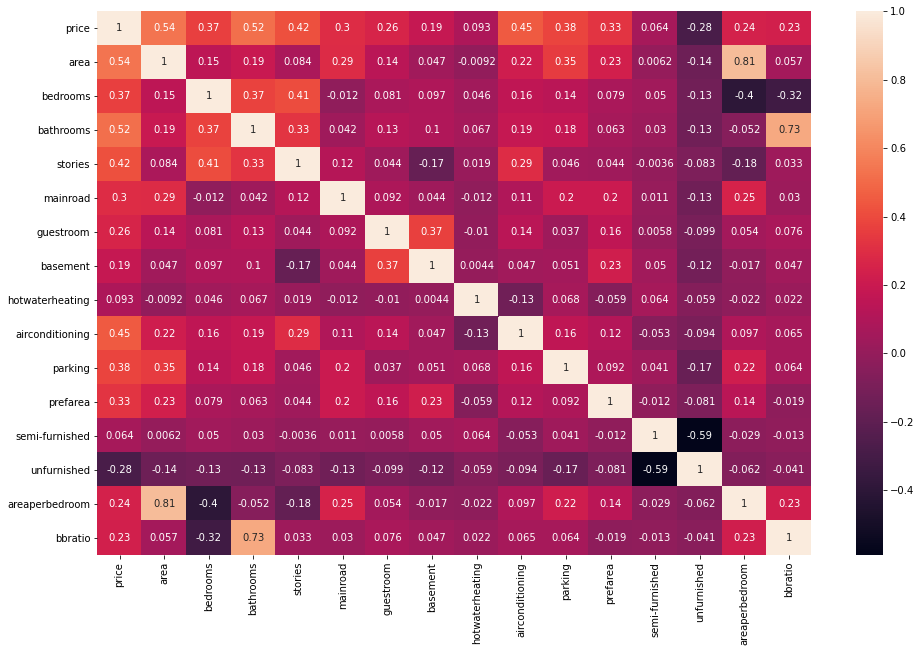

In [240]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(housing.corr(),annot = True)

Dropping variables to reduce complexity

In [241]:
X_train = X_train.drop('bbratio', 1)

In [242]:
X_train[:5]

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom
37,1.0,0.264568,0.206972,0.237920,0.731498,0.141284,-0.177982,-0.350459,-0.045872,0.684404,0.435474,-0.234862,-0.416514,-0.326606,0.069167
77,1.0,0.092746,0.006972,0.237920,0.398165,0.141284,-0.177982,-0.350459,-0.045872,0.684404,-0.231193,0.765138,-0.416514,-0.326606,0.055767
236,1.0,-0.156738,-0.193028,-0.095413,0.064832,0.141284,0.822018,0.649541,-0.045872,-0.315596,-0.231193,0.765138,0.583486,-0.326606,-0.061883
502,1.0,-0.114814,-0.193028,-0.095413,-0.268502,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,0.102141,-0.234862,0.583486,-0.326606,-0.012840
162,1.0,0.099619,0.206972,0.237920,0.064832,0.141284,0.822018,0.649541,-0.045872,-0.315596,-0.231193,0.765138,0.583486,-0.326606,-0.027312


In [243]:
lm_2 = sm.OLS(Y_train,X_train).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     53.54
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.47e-79
Time:                        00:34:23   Log-Likelihood:                 355.70
No. Observations:                 381   AIC:                            -681.4
Df Residuals:                     366   BIC:                            -622.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0048      0.005     

In [244]:
# Calculating Vif value
vif_cal(input_data=housing.drop(["bbratio"], axis=1), dependent_col="price")

,Var,Vif
13,areaperbedroom,14.14
0,area,12.84
1,bedrooms,4.99
12,unfurnished,1.68
11,semi-furnished,1.59
3,stories,1.50
6,basement,1.32
2,bathrooms,1.29
5,guestroom,1.22
9,parking,1.22


In [245]:
#Dropping bedroom (highly correlated variables and insignificant variables)
X_train = X_train.drop('bedrooms', 1)

In [246]:
lm_3 = sm.OLS(Y_train,X_train).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     57.64
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           2.74e-80
Time:                        00:34:23   Log-Likelihood:                 355.31
No. Observations:                 381   AIC:                            -682.6
Df Residuals:                     367   BIC:                            -627.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0049      0.005     

In [247]:
vif_cal(input_data=housing.drop(["bedrooms","bbratio"], axis=1), dependent_col="price")

,Var,Vif
0,area,4.21
12,areaperbedroom,3.88
11,unfurnished,1.67
10,semi-furnished,1.58
2,stories,1.49
5,basement,1.32
1,bathrooms,1.29
8,parking,1.22
4,guestroom,1.21
7,airconditioning,1.21


In [248]:
X_train = X_train.drop('areaperbedroom', 1)

In [249]:
lm_4 = sm.OLS(Y_train,X_train).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     61.71
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.98e-80
Time:                        00:34:24   Log-Likelihood:                 353.46
No. Observations:                 381   AIC:                            -680.9
Df Residuals:                     368   BIC:                            -629.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0050      0.005     

In [250]:
#no more variable with high p value
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom"], axis=1), dependent_col="price")

,Var,Vif
11,unfurnished,1.67
10,semi-furnished,1.58
0,area,1.32
2,stories,1.30
5,basement,1.30
1,bathrooms,1.22
4,guestroom,1.21
7,airconditioning,1.21
8,parking,1.21
3,mainroad,1.16


In [251]:
X_train = X_train.drop('semi-furnished', 1)

In [252]:
lm_5 = sm.OLS(Y_train,X_train).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     67.39
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           2.85e-81
Time:                        00:34:24   Log-Likelihood:                 353.26
No. Observations:                 381   AIC:                            -682.5
Df Residuals:                     369   BIC:                            -635.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0051      0.005     

In [253]:
X_train = X_train.drop('basement', 1)

In [254]:
lm_6 = sm.OLS(Y_train,X_train).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     72.92
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           3.31e-81
Time:                        00:34:24   Log-Likelihood:                 350.83
No. Observations:                 381   AIC:                            -679.7
Df Residuals:                     370   BIC:                            -636.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0049      0.005     

In [255]:
vif_cal(input_data=housing.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1), dependent_col="price")

,Var,Vif
0,area,1.31
2,stories,1.22
7,parking,1.21
1,bathrooms,1.20
6,airconditioning,1.20
3,mainroad,1.15
8,prefarea,1.10
4,guestroom,1.07
9,unfurnished,1.06
5,hotwaterheating,1.04


# Using model 6 for predict

In [264]:
# Adding  constant variable to test dataframe (W0)
X_test_m6 = sm.add_constant(X_test)

In [265]:
X_test_m6 = X_test_m6.drop(["bedrooms","bbratio","areaperbedroom","semi-furnished","basement"], axis=1)

In [266]:
y_pred_m6 = lm_6.predict(X_test_m6)

In [272]:
#Some predicted values according to the provided test data
y_pred_m6[:5]

195    0.166180
457   -0.160081
50     0.224503
269   -0.129652
205    0.044654
dtype: float64

# Model evaluation

In [269]:
#Root mean squared error
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_m6)))

RMSE : 0.08508568575666142


Text(0, 0.5, 'ytest-ypred')

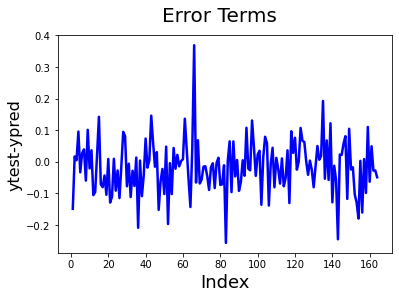

In [270]:
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,Y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'y_pred')

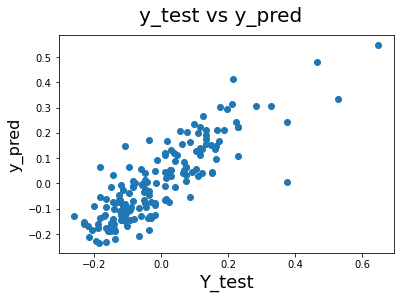

In [271]:
fig = plt.figure()
plt.scatter(Y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label